In [54]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

In [34]:
mdotm_train_feat = pd.read_csv('input_train.csv', index_col=0)
mdotm_train_feat.columns = [f'f{i}' for i in mdotm_train_feat.columns]

mdotm_train_tgt = pd.read_csv('label_train.csv', index_col=0).rename({'0':'target'}, axis=1)

mdotm_test_feat = pd.read_csv('input_test.csv', index_col=0)
mdotm_test_feat.columns = [f'f{i}' for i in mdotm_test_feat.columns]

# df dataset contains labeled data
df = mdotm_train_feat.join(mdotm_train_tgt)

# set target labels as 0, 1
df['target'] = df['target'].mask(df['target']==-1, 0)

# Check if target is balanced (yes it is) and if there are missing values (no)
print('values count', df.target.value_counts())
print('missing values', df.isna().sum().sum())

# shuffle train set with explicit seed for reproducibility
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

values count target
1    27000
0    27000
Name: count, dtype: int64
missing values 0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>,
        <Axes: title={'center': 'f2'}>],
       [<Axes: title={'center': 'f3'}>, <Axes: title={'center': 'f4'}>,
        <Axes: title={'center': 'f5'}>],
       [<Axes: title={'center': 'f6'}>, <Axes: title={'center': 'f7'}>,
        <Axes: title={'center': 'f8'}>],
       [<Axes: title={'center': 'f9'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

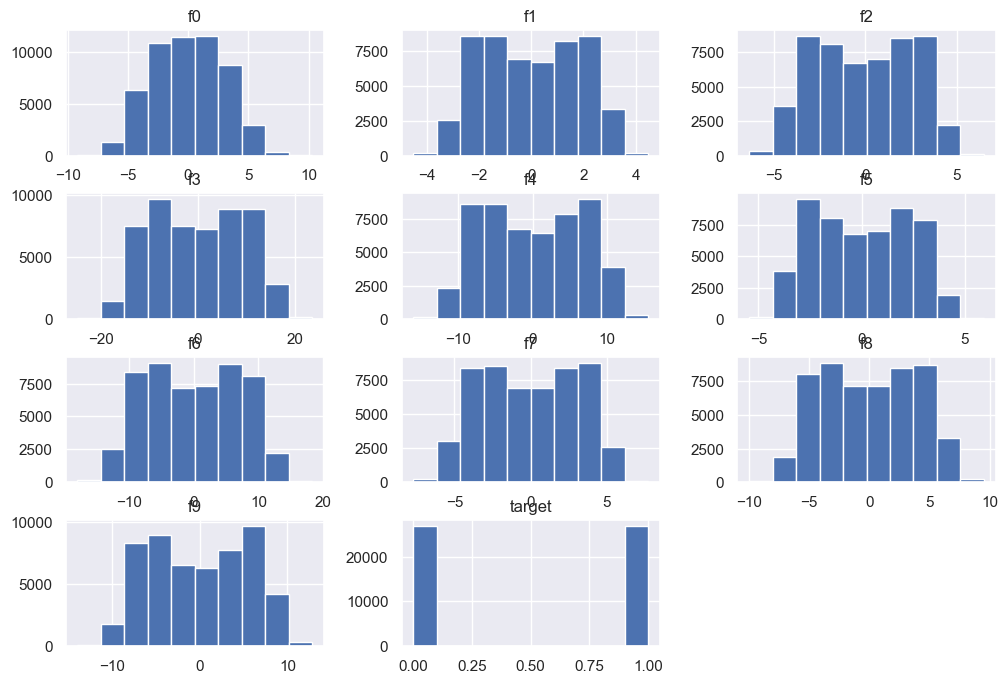

In [61]:
df.hist(figsize=(12,8))

<Axes: >

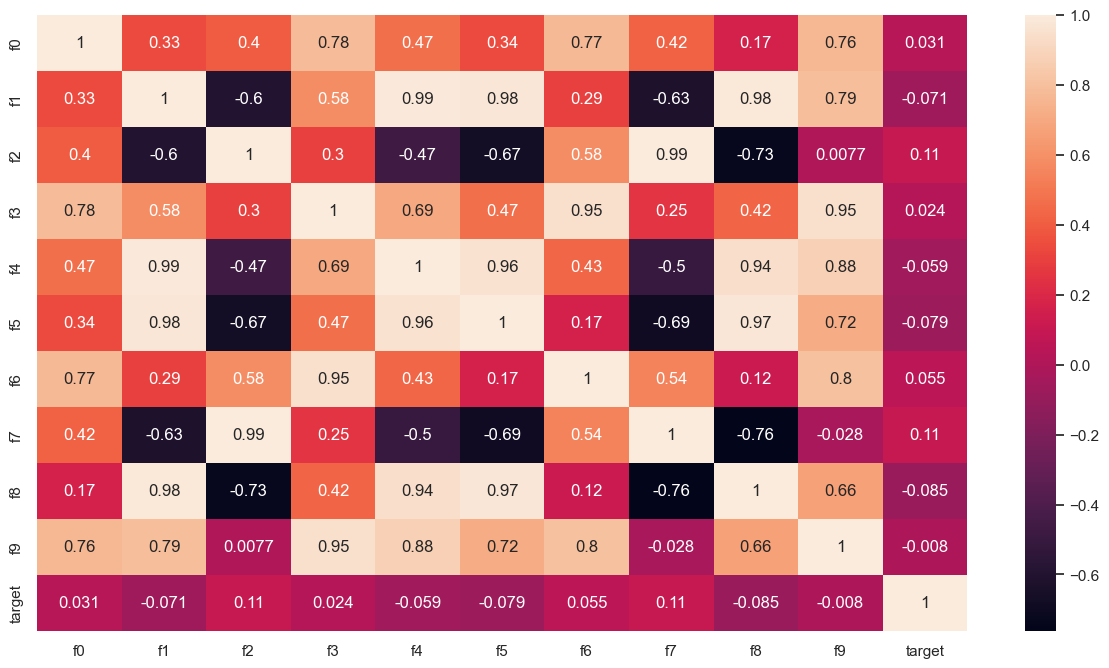

In [55]:

sns.heatmap(df.corr(method='spearman'), annot=True)